<a href="https://colab.research.google.com/github/potatoesAndMolasses/Intro_to_Deep_Learning/blob/main/TF_EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Vamos carregar os conjuntos de treinamento, teste e os metadados
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

In [28]:
# Nao temos todas as letras representadas, sera refletido na matriz de confusao
counts = np.zeros(26, dtype=int)
for _, labels in ds_test:
    counts[labels.numpy()] += 1
print("Distribuição de classes no teste:", counts)

Distribuição de classes no teste: [116 116 116 116 116 116 116 115 116 116 116 116 116 116 116 116 116 116
 111   0   0   0   0   0   0   0]


In [12]:
# Explorar metadados
print("=== INFORMAÇÕES DO DATASET ===")
print(f"Nome: {ds_info.name}")
print(f"Descrição: {ds_info.description}")
print(f"Tamanho do train: {ds_info.splits['train'].num_examples}")
print(f"Tamanho do test: {ds_info.splits['test'].num_examples}")
print(f"Classes: {ds_info.features['label'].num_classes}")

=== INFORMAÇÕES DO DATASET ===
Nome: emnist
Descrição: The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.

Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.
Tamanho do train: 88800
Tamanho do test: 14800
Classes: 37


In [21]:
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label - 1
ds_train = ds_train.map(normalize_img).shuffle(1024).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)

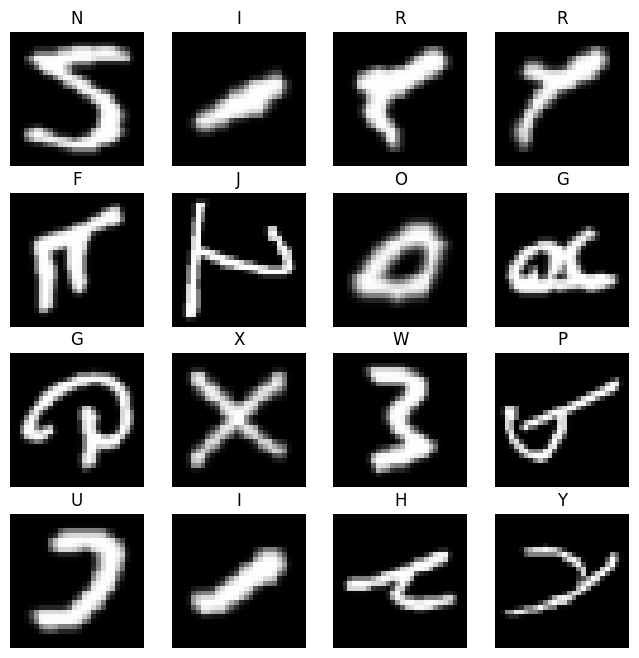

In [22]:
for images, labels in ds_train.take(1):
    plt.figure(figsize=(8,8))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(tf.squeeze(images[i]), cmap="gray")
        plt.title(chr(labels[i].numpy() + 65))
        plt.axis("off")
    plt.show()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Escolhemos o otimizador, a loss function e a metrica de avaliacao

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Treinamento ocorre aplicando backpropagation em cada batch do conjunto de treino.

# Durante o treino, o modelo calcula loss e accuracy nos batches de treino.

#Ao final de cada época, o modelo é avaliado no conjunto de validação/teste
#para medir generalização, comparando previsões com os rótulos reais.

history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 85s 121ms/step - accuracy: 0.6718 - loss: 1.1331 - val_accuracy: 0.8711 - val_loss: 0.3963
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 134s 109ms/step - accuracy: 0.8963 - loss: 0.3223 - val_accuracy: 0.9024 - val_loss: 0.2985
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 76s 109ms/step - accuracy: 0.9187 - loss: 0.2493 - val_accuracy: 0.9049 - val_loss: 0.2908
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 76s 109ms/step - accuracy: 0.9301 - loss: 0.2098 - val_accuracy: 0.9084 - val_loss: 0.2647
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 86s 116ms/step - accuracy: 0.9379 - loss: 0.1833 - val_accuracy: 0.9158 - val_loss: 0.2542
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 76s 109ms/step - accuracy: 0.9433 - loss: 0.1627 - val_accuracy: 0.9189 - val_loss: 0.2411
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 76s 109ms/step - accuracy: 0.9491 - loss: 0.1448 - val_accuracy: 0.9164 - val_loss: 0.2565
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.9511 - loss: 

In [26]:
test_loss, test_acc = model.evaluate(ds_test)
print("Acurácia no teste:", test_acc)

116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9170 - loss: 0.2634
Acurácia no teste: 0.9180405139923096


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━

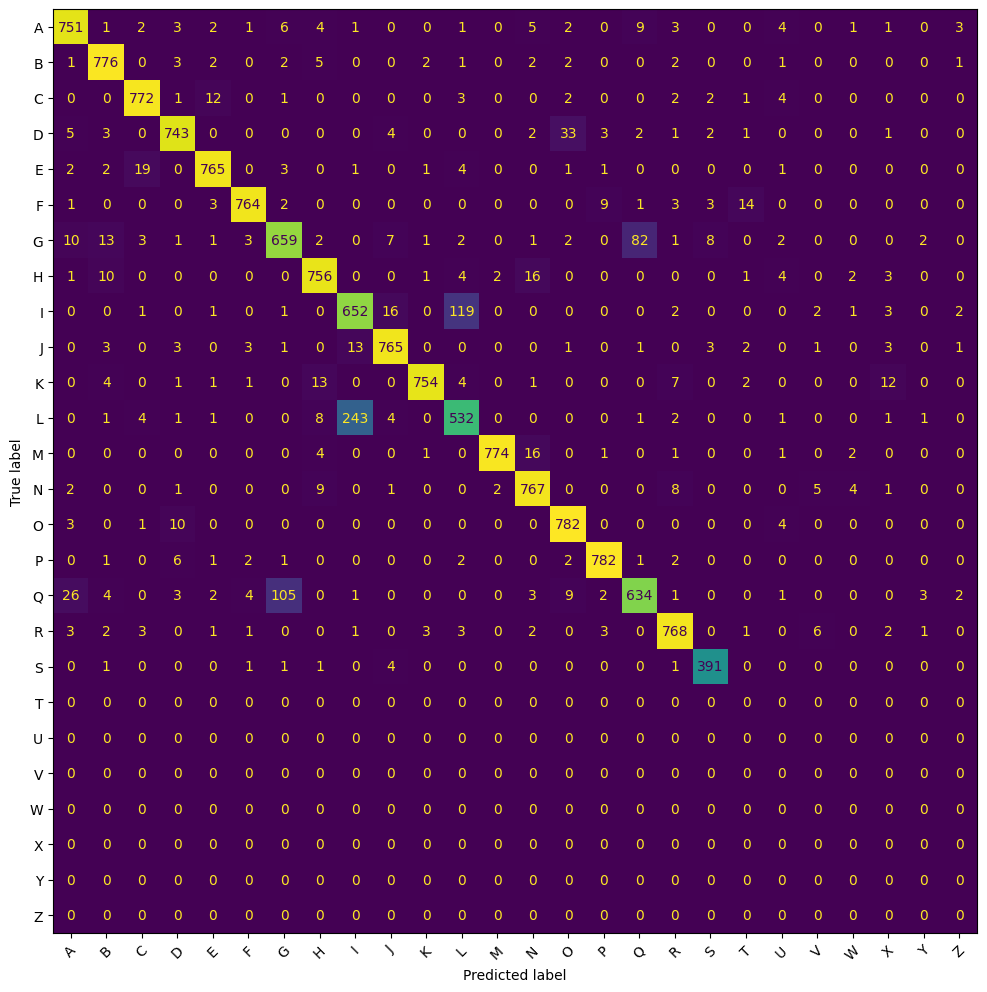

In [27]:
# Apresentacao da matriz de confusao, como nao usamos todo o conjuto de dados
# algumas letras nao

y_true = []
y_pred = []

for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=[chr(i+65) for i in range(26)]
    )
disp.plot(cmap='viridis', xticks_rotation=45, ax=ax, colorbar=False)
plt.show()
